In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset creation scripts

In [2]:
import numpy as np
import pybullet as pb

from environment import init_env, reset_env, get_camera_transforms, disconnect_env
from sampling import sample_one, _create_shape
from predicates import AtomObject, AtomColor
from utils import draw_frame
from time import time

np.set_printoptions(precision=4)

pybullet build time: May  8 2021 05:50:53


## Test pybullet routines

This just shows how inner routines are used for creating a scene in pybullet

Loaded EGL 1.5 after reload.
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=Quadro M2000M/PCIe/SSE2
GL_VERSION=4.6.0 NVIDIA 470.63.01
GL_SHADING_LANGUAGE_VERSION=4.60 NVIDIA
Version = 4.6.0 NVIDIA 470.63.01
Vendor = NVIDIA Corporation
Renderer = Quadro M2000M/PCIe/SSE2
ven = NVIDIA Corporation


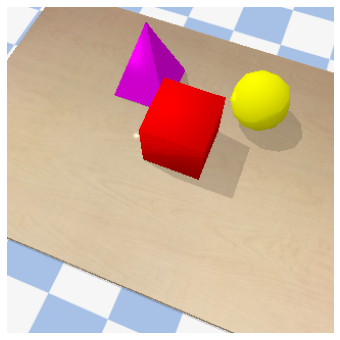

Destroy EGL OpenGL window.


In [11]:
init_env()
reset_env()

b1 = _create_shape(AtomObject.CUBE, AtomColor.RED, [0, 0, 1], [0, 0, 0])
b2 = _create_shape(AtomObject.SPHERE, AtomColor.YELLOW, [2, 2, 1], [0, 0, 0])
b3 = _create_shape(AtomObject.PYRAMID, AtomColor.PURPLE, [-2, 2, 1], [0, 0, 0])

cam_view_m, cam_proj_m = get_camera_transforms([2, -6, 12], [0, -1, 0])

width, height, rgbImg, depthImg, segImg = pb.getCameraImage(320, 320, cam_view_m, cam_proj_m, lightDirection=[-6, 1, 10])

draw_frame(rgbImg)
disconnect_env()

In [2]:
from batching import create_dataset, load_as_tf_dataset
from evaluation import evaluate_sample

## Create simple one-object dataset
Simple one object of random type and color in random position and orientation

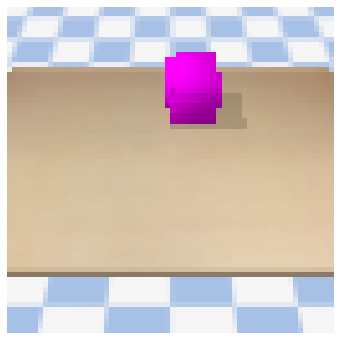

(purple cube on table) 1.0
(cyan sphere on table) 0.0


In [4]:
from datasets import one_object_random_pos
evaluate_sample(one_object_random_pos)

In [5]:
create_dataset('data/one_object_dataset2', 128, 128, one_object_random_pos)

Generating 128 * 128 = 16384 samples


100%|██████████| 128/128 [03:22<00:00,  1.58s/it]


In [30]:
ds = load_as_tf_dataset('data/one_object_dataset')

In [31]:
test_sample = next(ds.as_numpy_iterator())
print(test_sample[0][0].shape)
print(test_sample[0][1].shape)
print(test_sample[1].shape)

2021-10-08 16:07:09.393146: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-08 16:07:09.487450: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 50331648 exceeds 10% of free system memory.
2021-10-08 16:07:09.527753: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 50331648 exceeds 10% of free system memory.
2021-10-08 16:07:09.561303: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 100663296 exceeds 10% of free system memory.


(256, 256, 3)
(33,)
(1,)
